#**Importing Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

%matplotlib inline

# **Getting the files**

In [ ]:
df1 = pd.read_csv("Data/data1.csv")
df2 = pd.read_csv("Data/data2.csv")
df3 = pd.read_csv("Data/data3.csv")
df3 = df3.drop(columns='Track Name')

#merging based on id
df12 = pd.merge(df1, df2, on = 'id')
df = pd.merge(df12, df3, on = 'id')
df

,id,Artist Name,Track Name,Popularity,duration,Class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,key,mode,time_signature
0,0,BrMa,track_1,60.0,234.596,6,0.854745,0.563472,0.873150,0.027152,0.017169,NaN,0.070304,0.911981,0.558039,1.0,major,type 4
1,1,De,track_1,66.0,173.968,6,0.853669,0.596512,0.834119,0.034664,0.021285,NaN,0.107996,0.570260,0.412278,10.0,minor,type 4
2,2,DuAh,track_1,14.0,164.093,10,0.706262,0.884861,0.888523,0.010839,0.061647,NaN,0.241085,0.843637,0.525542,1.0,minor,type 4
3,3,EyGo,track_1,34.0,206.875,10,0.565311,0.380250,0.806818,0.024791,0.436747,NaN,0.112059,0.314487,0.610897,1.0,minor,type 4
4,4,HaLaBrdeLo,track_1,34.0,266.415,8,0.432968,0.373242,0.695840,0.010625,0.952811,0.932731,0.117139,0.161230,0.498027,11.0,minor,type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,6048,Mod,track_4,40.0,185.016,9,0.422208,0.994994,0.898256,0.055806,0.000103,0.360441,0.191303,0.226468,0.374596,1.0,major,type 4
6049,6049,LiDukl,track_3,55.0,178.605,6,0.349042,0.819782,0.899004,0.190813,0.398594,NaN,0.099868,0.437714,0.324293,5.0,minor,type 4
6050,6050,gnk,track_1,20.0,244.053,10,0.578223,0.632555,0.793317,0.079309,0.010141,0.211847,0.625114,0.725588,0.589835,9.0,minor,type 4
6051,6051,SmHiCo,track_1,34.0,216.222,9,0.536260,0.980977,0.880163,0.051513,0.000030,0.000136,0.660673,0.252356,0.401319,4.0,minor,type 4


In [ ]:
DF_PROB1 = pd.read_csv('./Data/data1_test.csv')
DF_PROB2 = pd.read_csv('./Data/data2_test.csv')
DF_PROB3 = pd.read_csv('./Data/data3_test.csv')
#merging based on id
DF_PROB12 = pd.merge(DF_PROB1, DF_PROB2, on='id')
DF_PROB = pd.merge(DF_PROB12, DF_PROB3, on='id')

In [ ]:
df_train = df.sample(frac = 0.8, random_state=0)
df_test = df.drop(df_train.index)

# **Basic Explanatory Data Analysis**

Data quality report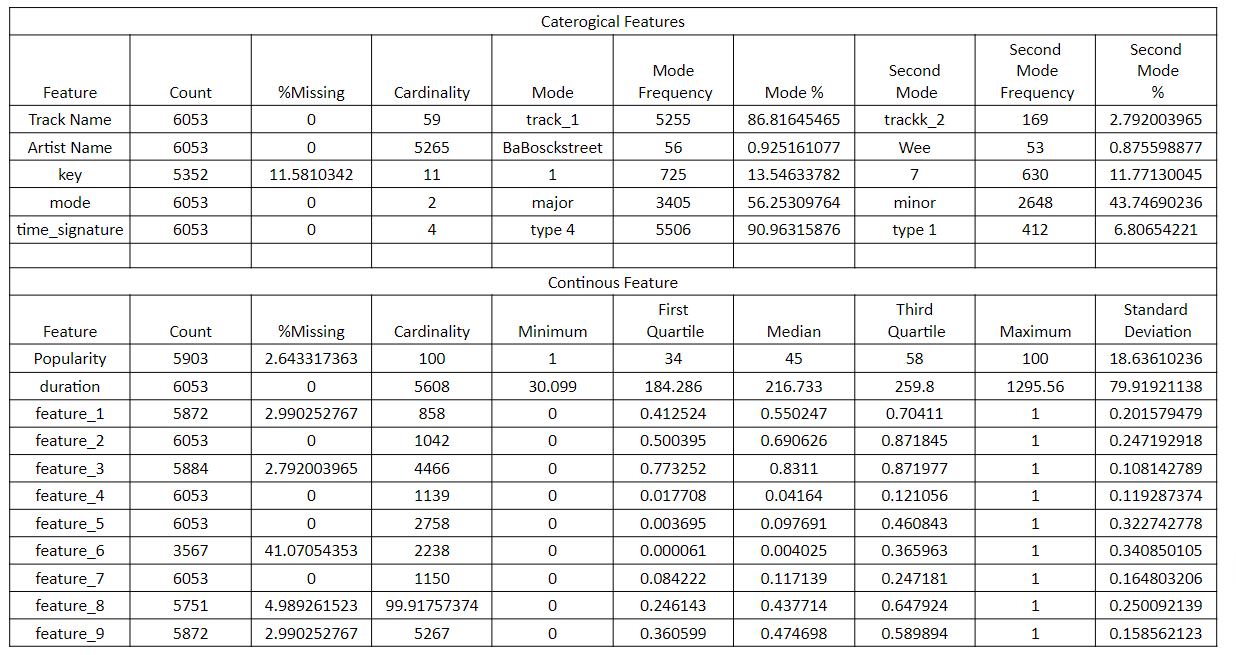

## **Histogram for continous features**

In [ ]:
fig, (ax) = plt.subplots(nrows=3, ncols=4)
itter = 0
fig.tight_layout(pad=1)
for feature_name in df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'Popularity', 'duration']]:
    x_var = df[feature_name]
    if feature_name != 'Popularity':
        x_var.hist(bins=128, ax=ax[math.floor(itter/4), itter % 4], grid=False)
    else:
        x_var.hist(bins=100, ax=ax[math.floor(itter/4), itter % 4], grid=False)

    ax[math.floor(itter/4), itter % 4].set_title(feature_name)
    itter +=1

## **Bar chart for categorical features**

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=2)
df['mode'].value_counts().plot(ax = ax1, kind='bar')
df['key'].value_counts().plot(ax = ax2, kind='bar')
df['time_signature'].value_counts().plot(ax = ax3, kind='bar')

## **Small Multiplies for continous**

In [ ]:
fig, (ax) = plt.subplots(nrows=11, ncols=6, figsize=(3*6, 2*11))
itter = 0
fig.tight_layout(pad=1)
for feature_name in df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'Popularity', 'duration']]:
    #Print the control
    x_var = df[feature_name]
    if feature_name != 'Popularity':
        x_var.hist(bins=128, ax=ax[math.floor(itter/6), itter % 6], grid=False)
    else:
        x_var.hist(bins=100, ax=ax[math.floor(itter/6), itter % 6], grid=False)

    ax[math.floor(itter/6), itter % 6].set_title(feature_name)
    itter +=1

    for class_num in df['Class'].unique():
        x_var = df[df['Class'] == class_num][feature_name]
        if feature_name != 'Popularity':
            x_var.hist(bins=128, ax=ax[math.floor(itter/6), itter % 6], grid=False)
        else:
            x_var.hist(bins=100, ax=ax[math.floor(itter/6), itter % 6], grid=False)

        ax[math.floor(itter/6), itter % 6].set_title(f"{feature_name} vs Class {class_num}")
        itter +=1

## **Small multiplies for discrete**

In [ ]:
fig, (ax) = plt.subplots(nrows=5, ncols=3, figsize=(3*6, 2*11))
fig.tight_layout(pad=5)
itter = 0
for class_num in df['Class'].unique():
    for feature_name in df[['mode', 'key', 'time_signature']]:
        df[df['Class'] == class_num][feature_name].value_counts().plot(ax = ax[math.floor(itter/3), itter % 3], kind='bar')
        ax[math.floor(itter/3), itter % 3].set_title(f"{feature_name} vs Class {class_num}")
        itter +=1

# **Preprocessing functions**

In [ ]:
def imputation(x, feature):
    if(pd.isna(x)):
        return df[feature].mean()
    else:
        return x
def clamp_feat4(x):
    if (x>0.4525261206445081):
        return 1
    else:
        return x/0.4525261206445081
def clamp_dur(x):
  if (x>443.1293056446612):
      return 1
  else:
      return x/443.1293056446612

## **Preprocess the training set**

In [ ]:
for features in ['feature_1', 'feature_2','feature_3', 'feature_4','feature_5','feature_7','feature_8','feature_9', 'Popularity']:
    df_train[features] = df_train[features].apply(lambda x: imputation(x, feature=features))
df_train['Popularity'] = df_train['Popularity'].apply(lambda x: x/100)
df_train['Class'].apply(lambda x: str(x))
df_train['duration'] =df_train['duration'].apply(lambda x: clamp_dur(x))
df_train['feature_4'] =df_train['feature_4'].apply(lambda x: clamp_feat4(x))

4985     9
472      9
5781     9
4641     9
1142    10
        ..
2020    10
5396     8
367      4
3436     6
4256    10
Name: Class, Length: 4842, dtype: object

Create numpy filled with the features

In [ ]:
X_train_con = df_train[['feature_1','feature_2','feature_3', 'feature_4','feature_5','feature_8','feature_9','Popularity', 'duration']].values

Create polynomial features

In [ ]:
X_poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False).fit_transform(X=X_train_con)

Building the model

In [ ]:
model_con = OneVsRestClassifier(
    estimator= LogisticRegression(class_weight='balanced', solver='newton-cg', max_iter=1000, C=32),
)

In [ ]:
model_con.fit(X_poly, df_train[['Class']].values)

OneVsRestClassifier(estimator=LogisticRegression(C=32, class_weight='balanced',
                                                 max_iter=1000,
                                                 solver='newton-cg'))

In [ ]:
def predict(X):
    # Preprocess
    classes = [ 4,  6,  8,  9, 10]
    for features in ['feature_1','feature_2', 'feature_3', 'feature_4','feature_5','feature_8', 'feature_9','Popularity', 'duration']:
        X[features] = X[features].apply(lambda x: imputation(x, feature=features))
    X['Popularity'] = X['Popularity'].apply(lambda x: x/100)
    X['duration'] =X['duration'].apply(lambda x: clamp_dur(x))
    X['feature_4'] = X['feature_4'].apply(lambda x: clamp_feat4(x))
    X_polynom = preprocessing.PolynomialFeatures(degree=5, include_bias=False).fit_transform(X=X[['feature_1','feature_2','feature_3', 'feature_4','feature_5','feature_8','feature_9','Popularity', 'duration']])

    return model_con.predict(X_polynom)



In [ ]:
yhat = predict(df_test)

id                    6050
Artist Name            ◊ûê
Track Name         track_9
Popularity             1.0
duration               1.0
Class                   10
feature_1         0.974177
feature_2              1.0
feature_3         0.999551
feature_4              1.0
feature_5              1.0
feature_6         0.990964
feature_7         0.987809
feature_8         0.983432
feature_9         0.978415
key                   11.0
mode                 minor
time_signature      type 5
dtype: object


# **Getting the score on the test set**

In [ ]:
f1_score(y_pred=yhat, y_true=df_test[['Class']].values, average='micro')

0.8117258464079273

## Class distribution for prediction

<Axes: xlabel='Class'>

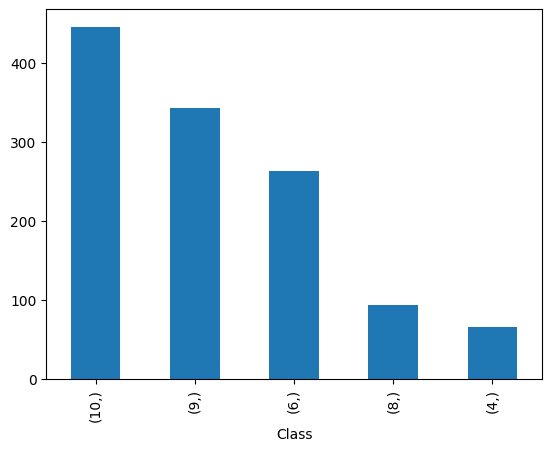

In [ ]:
pd.DataFrame({'Class':yhat}).value_counts().plot(kind='bar')

## Submitted Dataframe

In [ ]:
list_class = predict(DF_PROB)
df_to_submit = pd.DataFrame({'id' : DF_PROB['id'] })


id                     749
Artist Name             ◊û
Track Name_x       track_9
Popularity            0.94
duration               1.0
feature_1         0.990316
feature_2         0.997998
feature_3         0.971426
feature_4              1.0
feature_5         0.997992
feature_6         0.976908
feature_7         0.981713
feature_8         0.988609
feature_9         0.999822
Track Name_y       track_9
key                   11.0
mode                 minor
time_signature      type 5
dtype: object


In [ ]:
df_to_submit['Class'] = list_class

In [ ]:
df_to_submit[['id', 'Class']]

,id,Class
0,0,10
1,1,10
2,2,9
3,3,10
4,4,10
...,...,...
745,745,8
746,746,10
747,747,9
748,748,8


<Axes: xlabel='Class'>

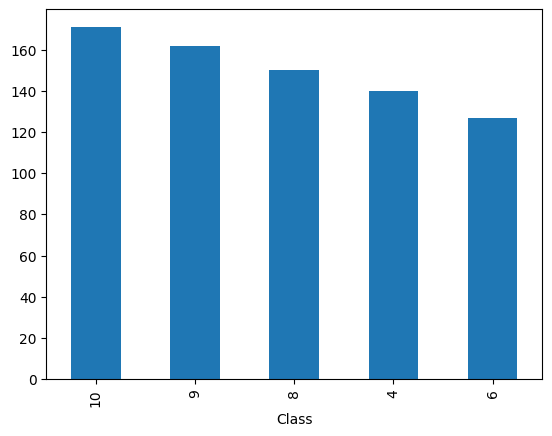

In [ ]:
df_to_submit['Class'].value_counts().plot(kind='bar')

In [ ]:
df_to_submit.to_csv('to_submit3.csv', index =False)

<Axes: xlabel='Class'>

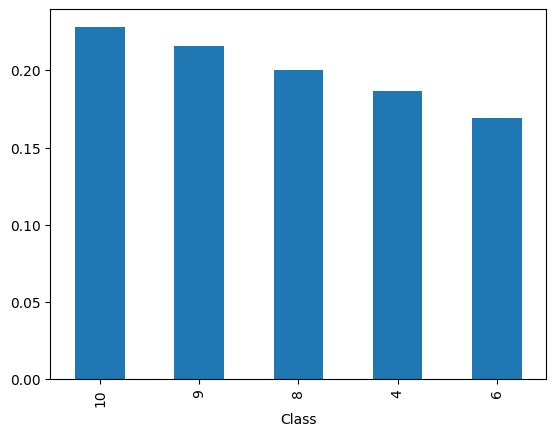

In [ ]:
(pd.read_csv('to_submit3.csv')['Class'].value_counts(len(pd.read_csv('to_submit3.csv')))).plot(kind='bar')